In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler

In [38]:
df=pd.read_csv('GOOGL.csv')

In [39]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [40]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
scaler=MinMaxScaler(feature_range=(0,1))


In [42]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
data=df[['Close']]

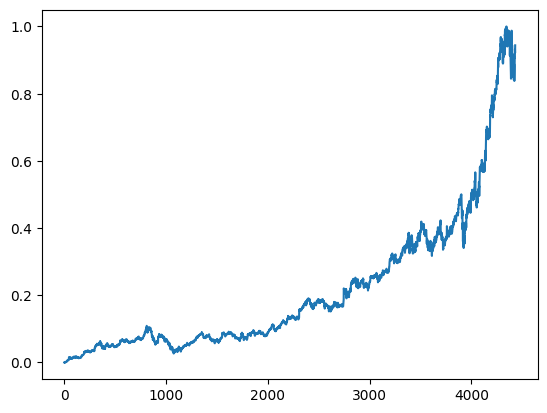

In [43]:
scaled_data = scaler.fit_transform(data)
plt.plot(scaled_data)

In [44]:
def create(time,scaled_data):
    x,y=[],[]
    for i in range(time,len(scaled_data)):
        x.append(scaled_data[i-time:i,0])
        y.append(scaled_data[i,0])
    return np.asarray(x),np.asarray(y)
x,y=create(60,scaled_data)
x=x.reshape(x.shape[0],x.shape[1],1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)



In [ ]:
model=Sequential()
model.add(SimpleRNN(units=40,input_shape=(x_train.shape[1],1),return_sequences=False))
model.add(SimpleRNN(units=20,return_sequences=False))
model.add(SimpleRNN(units=10,return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss=['mean_squared_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 40)                1680      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [46]:
history=model.fit(x_train,y_train,epochs=40,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/40
55/55 [==============================] - 1s 10ms/step - loss: 5.7513e-04 - val_loss: 0.0426
Epoch 2/40
55/55 [==============================] - 0s 8ms/step - loss: 6.7081e-05 - val_loss: 0.0357
Epoch 3/40
55/55 [==============================] - 0s 8ms/step - loss: 6.8870e-05 - val_loss: 0.0302
Epoch 4/40
55/55 [==============================] - 0s 7ms/step - loss: 5.4851e-05 - val_loss: 0.0249
Epoch 5/40
55/55 [==============================] - 0s 8ms/step - loss: 5.5385e-05 - val_loss: 0.0212
Epoch 6/40
55/55 [==============================] - 0s 7ms/step - loss: 4.3836e-05 - val_loss: 0.0186
Epoch 7/40
55/55 [==============================] - 0s 8ms/step - loss: 4.1218e-05 - val_loss: 0.0170
Epoch 8/40
55/55 [==============================] - 0s 7ms/step - loss: 3.4699e-05 - val_loss: 0.0136
Epoch 9/40
55/55 [==============================] - 0s 8ms/step - loss: 3.4671e-05 - val_loss: 0.0117
Epoch 10/40
55/55 [==============================] - 0s 7ms/step - loss: 2.9845e-

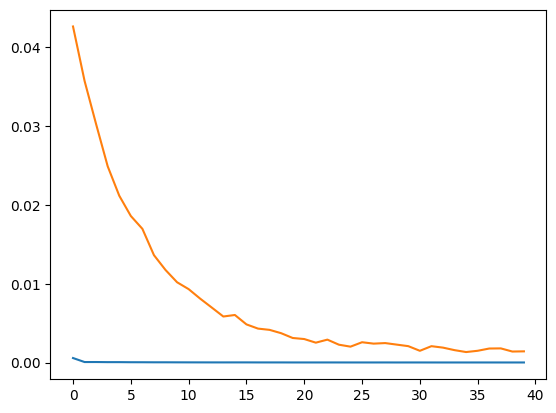

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [48]:
y_predict=model.predict(x_test)


28/28 [==============================] - 0s 3ms/step


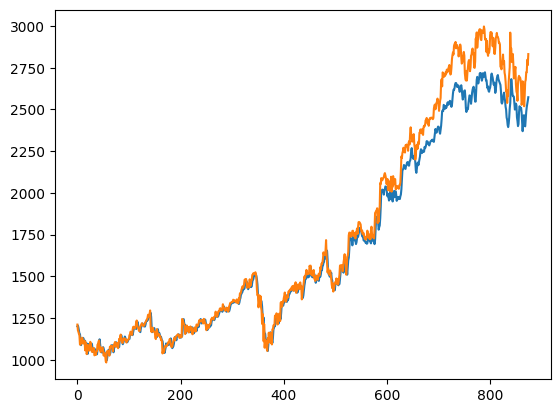

In [49]:
y_predict=scaler.inverse_transform(y_predict)
y_actual=scaler.inverse_transform(y_test.reshape(-1,1))
plt.plot(y_predict)
plt.plot(y_actual)